Here’s what you’ll get to analyze:

• Patient Demographics: Including gender, age, and race.

• ER Operations: Wait times, admission flags, and department referrals.

• Satisfaction Metrics: Ratings from patients reflecting their experience.

This dataset is rich with possibilities for exploratory analysis, hypothesis testing, and visualization.

Why Should You Take on This Challenge?

This project will enhance your ability to:

1. Spot Trends: Examine patterns in wait times and satisfaction scores.

2. Correlate Factors: Discover relationships between demographics, department referrals, and admission rates.

3. Sharpen Your Tools: Practice with Excel, Python, SQL, or any tool of your choice.

4. Boost Communication: Present actionable insights through clear visualizations and summaries.

How to Get Started

1. Download the Dataset: Click here to request a copy.

2. Load the data into your preferred analysis tool.

3. Ask and answer questions like:

• How do wait times vary by department and age group?

• Are patients with higher wait times less likely to report satisfaction?

• Which demographic is most frequently referred to specific departments?

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis

In [2]:
df =pd.read_csv("Hospital_Data.csv")

In [3]:
df.head()

,Patient Id,Patient Admission Date,Patient First Inital,Patient Last Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM
0,145-39-5406,20-03-2024 08:47,H,Glasspool,M,69,White,NaN,False,10.0,39,0
1,316-34-3057,15-06-2024 11:29,X,Methuen,M,4,Native American/Alaska Native,NaN,True,NaN,27,0
2,897-46-3852,20-06-2024 09:13,P,Schubuser,F,56,African American,General Practice,True,9.0,55,0
3,358-31-9711,04-02-2024 22:34,U,Titcombe,F,24,Native American/Alaska Native,General Practice,True,8.0,31,0
4,289-26-0537,04-09-2024 17:48,Y,Gionettitti,M,5,African American,Orthopedics,False,NaN,10,0


In [4]:
df.columns=[
    "Id",
    "Admission date",
    "First intial name",
    "Last name",
    "Gender",
    "Age",
    "Race",
    "Department referral",
    "Admission flag",
    "Satisfaction score",
    "Waiting time",
    "Patient CM"
]

In [5]:
df.head()

,Id,Admission date,First intial name,Last name,Gender,Age,Race,Department referral,Admission flag,Satisfaction score,Waiting time,Patient CM
0,145-39-5406,20-03-2024 08:47,H,Glasspool,M,69,White,NaN,False,10.0,39,0
1,316-34-3057,15-06-2024 11:29,X,Methuen,M,4,Native American/Alaska Native,NaN,True,NaN,27,0
2,897-46-3852,20-06-2024 09:13,P,Schubuser,F,56,African American,General Practice,True,9.0,55,0
3,358-31-9711,04-02-2024 22:34,U,Titcombe,F,24,Native American/Alaska Native,General Practice,True,8.0,31,0
4,289-26-0537,04-09-2024 17:48,Y,Gionettitti,M,5,African American,Orthopedics,False,NaN,10,0


In [6]:
df.isna().sum()

Id                        0
Admission date            0
First intial name         0
Last name                 0
Gender                    0
Age                       0
Race                      0
Department referral    5400
Admission flag            0
Satisfaction score     6699
Waiting time              0
Patient CM                0
dtype: int64

In [10]:
df["Department referral"].value_counts()

Department referral
General Practice    1840
Orthopedics          995
Physiotherapy        276
Cardiology           248
Neurology            193
Gastroenterology     178
Renal                 86
Name: count, dtype: int64

In [11]:
df["Department referral"] =df["Department referral"].fillna(df["Department referral"].mode()[0])

In [12]:
df.columns

Index(['Id', 'Admission date', 'First intial name', 'Last name', 'Gender',
       'Age', 'Race', 'Department referral', 'Admission flag',
       'Satisfaction score', 'Waiting time', 'Patient CM'],
      dtype='object')

In [28]:
df["Satisfaction score"].describe()

count    2517.000000
mean        4.992054
std         3.138043
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Satisfaction score, dtype: float64

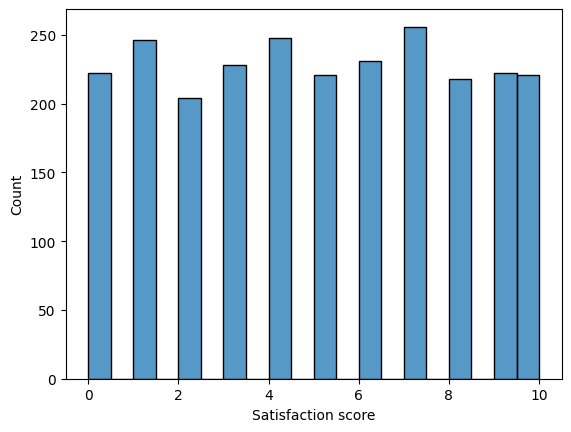

In [31]:
sns.histplot(x=df["Satisfaction score"],bins=20)
plt.show()

In [24]:
df["Satisfaction score"].value_counts()

Satisfaction score
7.0     256
4.0     248
1.0     246
6.0     231
3.0     228
9.0     222
0.0     222
10.0    221
5.0     221
8.0     218
2.0     204
Name: count, dtype: int64

In [34]:
df["Satisfaction score"]=df["Satisfaction score"].fillna(df["Satisfaction score"].mean())

In [35]:
df["Satisfaction score"] =df["Satisfaction score"].astype(int)

In [36]:
df.isna().sum()

Id                     0
Admission date         0
First intial name      0
Last name              0
Gender                 0
Age                    0
Race                   0
Department referral    0
Admission flag         0
Satisfaction score     0
Waiting time           0
Patient CM             0
dtype: int64

In [37]:
df.head()

,Id,Admission date,First intial name,Last name,Gender,Age,Race,Department referral,Admission flag,Satisfaction score,Waiting time,Patient CM
0,145-39-5406,20-03-2024 08:47,H,Glasspool,M,69,White,General Practice,False,10,39,0
1,316-34-3057,15-06-2024 11:29,X,Methuen,M,4,Native American/Alaska Native,General Practice,True,4,27,0
2,897-46-3852,20-06-2024 09:13,P,Schubuser,F,56,African American,General Practice,True,9,55,0
3,358-31-9711,04-02-2024 22:34,U,Titcombe,F,24,Native American/Alaska Native,General Practice,True,8,31,0
4,289-26-0537,04-09-2024 17:48,Y,Gionettitti,M,5,African American,Orthopedics,False,4,10,0


In [38]:
df.dtypes

Id                     object
Admission date         object
First intial name      object
Last name              object
Gender                 object
Age                     int64
Race                   object
Department referral    object
Admission flag           bool
Satisfaction score      int32
Waiting time            int64
Patient CM              int64
dtype: object

In [42]:
df["Admission date"] =pd.to_datetime(df["Admission date"],format="%Y-%m-%d")

In [43]:
df.dtypes

Id                             object
Admission date         datetime64[ns]
First intial name              object
Last name                      object
Gender                         object
Age                             int64
Race                           object
Department referral            object
Admission flag                   bool
Satisfaction score              int32
Waiting time                    int64
Patient CM                      int64
dtype: object

In [44]:
df.head()

,Id,Admission date,First intial name,Last name,Gender,Age,Race,Department referral,Admission flag,Satisfaction score,Waiting time,Patient CM
0,145-39-5406,2024-03-20 08:47:00,H,Glasspool,M,69,White,General Practice,False,10,39,0
1,316-34-3057,2024-06-15 11:29:00,X,Methuen,M,4,Native American/Alaska Native,General Practice,True,4,27,0
2,897-46-3852,2024-06-20 09:13:00,P,Schubuser,F,56,African American,General Practice,True,9,55,0
3,358-31-9711,2024-02-04 22:34:00,U,Titcombe,F,24,Native American/Alaska Native,General Practice,True,8,31,0
4,289-26-0537,2024-09-04 17:48:00,Y,Gionettitti,M,5,African American,Orthopedics,False,4,10,0


In [46]:
df["Waiting time"].describe()

count    9216.000000
mean       35.259874
std        14.735323
min        10.000000
25%        23.000000
50%        35.000000
75%        48.000000
max        60.000000
Name: Waiting time, dtype: float64

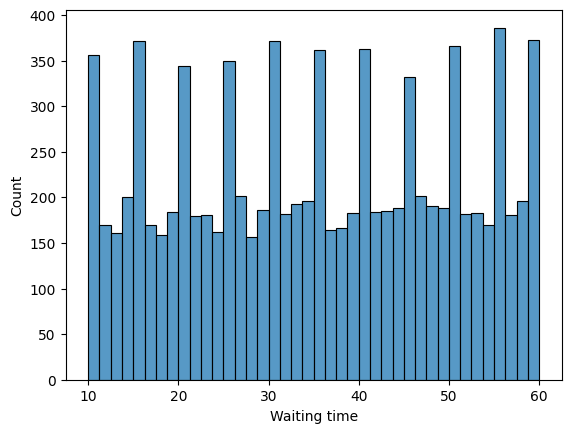

In [49]:
sns.histplot(x=df["Waiting time"],bins=40)
plt.show()

#### Descriptive statistics

In [51]:
df.columns

Index(['Id', 'Admission date', 'First intial name', 'Last name', 'Gender',
       'Age', 'Race', 'Department referral', 'Admission flag',
       'Satisfaction score', 'Waiting time', 'Patient CM'],
      dtype='object')

In [52]:
df[["Age","Satisfaction score","Waiting time","Patient CM"]].describe()

,Age,Satisfaction score,Waiting time,Patient CM
count,9216.000000,9216.000000,9216.000000,9216.000000
mean,39.855143,4.270942,35.259874,0.052083
std,22.755125,1.698247,14.735323,0.222207
min,1.000000,0.000000,10.000000,0.000000
25%,20.000000,4.000000,23.000000,0.000000
50%,39.000000,4.000000,35.000000,0.000000
75%,60.000000,4.000000,48.000000,0.000000
max,79.000000,10.000000,60.000000,1.000000


In [54]:
df[["Gender","Race","Department referral"]].describe()

,Gender,Race,Department referral
count,9216,9216,9216
unique,3,7,7
top,M,White,General Practice
freq,4705,2571,7240


#### Demographic Analysis

In [55]:
df["Race"].value_counts()

Race
White                            2571
African American                 1951
Two or More Races                1557
Asian                            1060
Declined to Identify             1030
Pacific Islander                  549
Native American/Alaska Native     498
Name: count, dtype: int64

In [56]:
df["Gender"].value_counts()

Gender
M     4705
F     4487
NC      24
Name: count, dtype: int64

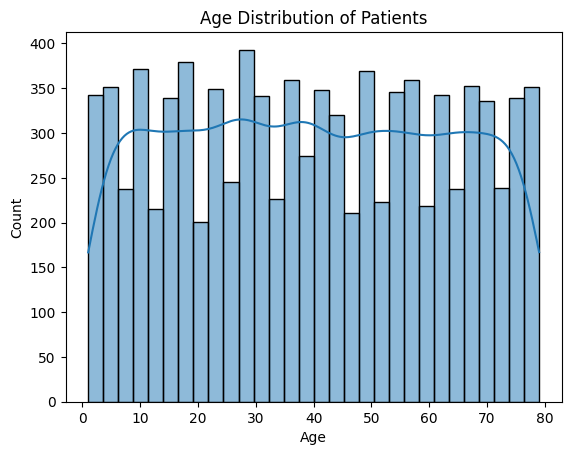

In [58]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.show()

#### Department & Admission Trends

In [59]:
df["Department referral"].value_counts()

Department referral
General Practice    7240
Orthopedics          995
Physiotherapy        276
Cardiology           248
Neurology            193
Gastroenterology     178
Renal                 86
Name: count, dtype: int64

##### Admissions per department

In [60]:
df.groupby("Department referral")["Admission flag"].sum().sort_values(ascending=False)

Department referral
General Practice    3623
Orthopedics          498
Physiotherapy        137
Cardiology           122
Neurology             97
Gastroenterology      89
Renal                 46
Name: Admission flag, dtype: int64

##### Average age per department

In [61]:
df.groupby("Department referral")["Age"].mean()

Department referral
Cardiology          39.713710
Gastroenterology    42.303371
General Practice    40.064641
Neurology           38.010363
Orthopedics         38.661307
Physiotherapy       39.597826
Renal               36.337209
Name: Age, dtype: float64

#### Patient Satisfaction Analysis


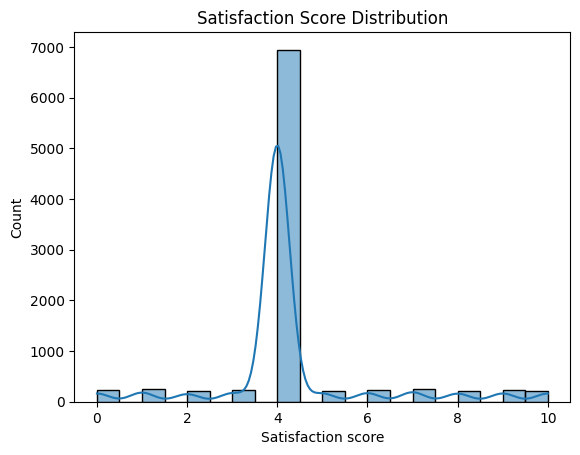

In [63]:
sns.histplot(df["Satisfaction score"], bins=20, kde=True)
plt.title("Satisfaction Score Distribution")
plt.show()

##### Satisfaction by department:

In [64]:
df.groupby("Department referral")["Satisfaction score"].mean().sort_values(ascending=False)

Department referral
Gastroenterology    4.544944
Neurology           4.352332
Cardiology          4.326613
Physiotherapy       4.297101
General Practice    4.263398
Orthopedics         4.250251
Renal               4.151163
Name: Satisfaction score, dtype: float64

##### Satisfaction by waiting time 

In [67]:
import scipy.stats as stats

correlation, p_value = stats.pearsonr(df["Waiting time"], df["Satisfaction score"])
print(f"Correlation: {correlation}, P-value: {p_value}")


Correlation: -0.009782842471660724, P-value: 0.34770612255156236


A strong negative correlation means longer waiting times reduce satisfaction.

#### Waiting Time Analysis

In [68]:
df.groupby("Department referral")["Waiting time"].mean().sort_values()

Department referral
Renal               34.697674
Orthopedics         34.982915
General Practice    35.196409
Cardiology          35.354839
Gastroenterology    35.831461
Physiotherapy       36.565217
Neurology           36.803109
Name: Waiting time, dtype: float64

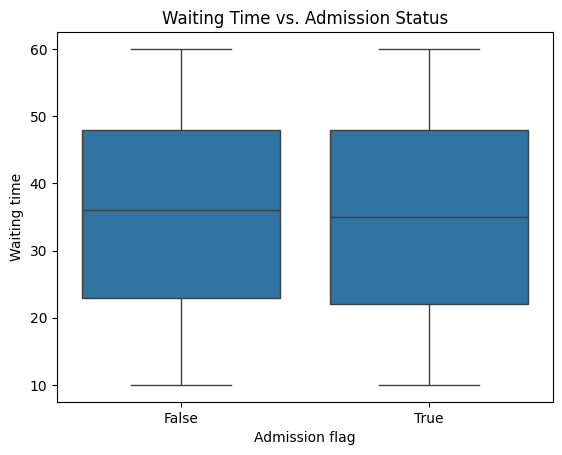

In [69]:
sns.boxplot(x="Admission flag", y="Waiting time", data=df)
plt.title("Waiting Time vs. Admission Status")
plt.show()